In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.python.keras import backend as k

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import cv2 as cv

import seaborn as sns

In [2]:
PATH1 = os.path.join(r'E:\Multiple_planes\Negative_plane')
PATH2 = os.path.join(r'E:\Multiple_planes\Focused_plane')
PATH3 = os.path.join(r'E:\Multiple_planes\Plan_iden')

In [3]:
train_dir1 = os.path.join(PATH1, 'Train')
validation_dir1 = os.path.join(PATH1, 'Val')

In [4]:
train_dir2 = os.path.join(PATH2, 'Train')
validation_dir2 = os.path.join(PATH2, 'Val')

In [5]:
train_dir3 = os.path.join(PATH3, 'Train')
validation_dir3 = os.path.join(PATH3, 'Val')

In [6]:
Train_Set1=r"E:\Multiple_planes\Negative_plane\Train"
Val_Set1=r"E:\Multiple_planes\Negative_plane\Val"

#Categroized images
#4 types of subCategories

CATEGORIES=["Double","Triple","Trash"]

In [7]:
Train_Set2=r"E:\Multiple_planes\Focused_plane\Train"
Val_Set2=r"E:\Multiple_planes\Focused_plane\Val"

#Categroized images
#4 types of subCategories

CATEGORIES=["Double","Triple","Trash"]

In [8]:
Train_Set3=r"E:\Multiple_planes\Plan_iden\Train"
Val_Set3=r"E:\Multiple_planes\Plan_iden\Val"

#Categroized images
#4 types of subCategories

CATEGORIES=["Double","Triple","Trash"]

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [10]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 48
IMG_WIDTH = 48

In [11]:
train_data_gen1 = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir1,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 11531 images belonging to 3 classes.


In [12]:
train_data_gen2 = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir2,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 11531 images belonging to 3 classes.


In [13]:
train_data_gen3 = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir3,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 11531 images belonging to 3 classes.


In [14]:
val_data_gen1 = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir1,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2401 images belonging to 3 classes.


In [15]:
val_data_gen2 = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir2,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2401 images belonging to 3 classes.


In [16]:
val_data_gen3 = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir3,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2401 images belonging to 3 classes.


In [17]:
Train_Data1=[]
import cv2 as cv
for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(Train_Set1,category)
        
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),0) #0 for grey scale(8bit image)
            Train_Data1.append([img,label])

In [18]:
Train_Data2=[]
import cv2 as cv
for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(Train_Set2,category)
        
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1) #1 for RGB image
            Train_Data2.append([img,label])

In [19]:
Train_Data3=[]
import cv2 as cv
for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(Train_Set3,category)
        
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),0)
            Train_Data3.append([img,label])

In [20]:
Test_Data1=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(Val_Set1,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),0)
            
            Test_Data1.append([img,label])

In [21]:
Test_Data2=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(Val_Set2,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            
            Test_Data2.append([img,label])

In [22]:
Test_Data3=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(Val_Set3,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),0)
            
            Test_Data3.append([img,label])

In [23]:
print(len(Train_Data1))
print(len(Train_Data2))
print(len(Train_Data3))
print(len(Test_Data1))
print(len(Test_Data2))
print(len(Test_Data3))

11531
11531
11531
2401
2401
2401


In [24]:
import random

random.shuffle(Train_Data1)
random.shuffle(Train_Data2)
random.shuffle(Train_Data3)

In [25]:
for lbl in Train_Data1[:10]:
    print(lbl[1])

2
0
2
1
2
2
0
2
2
2


In [26]:
train_X1=[]
train_y1=[]
for features,label in Train_Data1:
    train_X1.append(features)
    train_y1.append(label)

len(train_X1),len(train_y1)

(11531, 11531)

In [27]:
train_X2=[]
train_y2=[]
for features,label in Train_Data2:
    train_X2.append(features)
    train_y2.append(label)

len(train_X2),len(train_y2)

(11531, 11531)

In [28]:
train_X3=[]
train_y3=[]
for features,label in Train_Data3:
    train_X3.append(features)
    train_y3.append(label)

len(train_X3),len(train_y3)

(11531, 11531)

In [29]:
#lets seprate the feature and target variable
test_X1=[]
test_y1=[]
for features,label in Test_Data1:
    test_X1.append(features)
    test_y1.append(label)

len(test_X1),len(test_y1)

(2401, 2401)

In [30]:
test_X2=[]
test_y2=[]
for features,label in Test_Data2:
    test_X2.append(features)
    test_y2.append(label)  

len(test_X2),len(test_y2)

(2401, 2401)

In [31]:
test_X3=[]
test_y3=[]

for features,label in Test_Data3:
    test_X3.append(features)
    test_y3.append(label)   
    
len(test_X3),len(test_y3)

(2401, 2401)

In [32]:

train_X1=np.array(train_X1).reshape(-1,48,48,1)
train_X1=train_X1/255.0
train_X1.shape

(11531, 48, 48, 1)

In [33]:

train_X2=np.array(train_X2).reshape(-1,48,48,3)
train_X2=train_X2/255.0
train_X2.shape

(11531, 48, 48, 3)

In [34]:
train_X3=np.array(train_X3).reshape(-1,48,48,1)
train_X3=train_X3/255.0
train_X3.shape

(11531, 48, 48, 1)

In [35]:
test_X1=np.array(test_X1).reshape(-1,48,48,1)
test_X1=test_X1/255.0
test_X1.shape

(2401, 48, 48, 1)

In [36]:
test_X2=np.array(test_X2).reshape(-1,48,48,3)
test_X2=test_X2/255.0
test_X2.shape

(2401, 48, 48, 3)

In [37]:
test_X3=np.array(test_X3).reshape(-1,48,48,1)
test_X3=test_X3/255.0
test_X3.shape

(2401, 48, 48, 1)

In [38]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

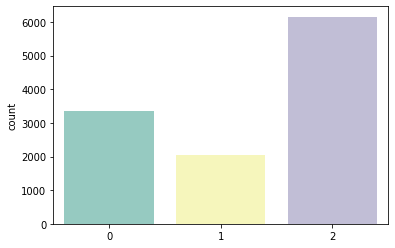

In [39]:
sns.countplot(train_y1,palette='Set3')

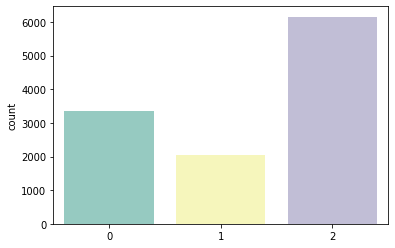

In [40]:
sns.countplot(train_y2,palette='Set3')

In [41]:
from keras.utils import to_categorical
#train y
one_hot_train1=to_categorical(train_y1)
one_hot_train1

Using TensorFlow backend.


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [42]:
from keras.utils import to_categorical
#train y
one_hot_train2=to_categorical(train_y2)
one_hot_train2

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [43]:
from keras.utils import to_categorical
#train y
one_hot_train3=to_categorical(train_y3)
one_hot_train3

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [44]:
one_hot_test1=to_categorical(test_y1)
one_hot_test1

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [45]:
one_hot_test2=to_categorical(test_y2)
one_hot_test2

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [46]:
one_hot_test3=to_categorical(test_y3)
one_hot_test3

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [47]:
merged  =np.concatenate((train_X1,train_X2), axis=-1)

In [48]:
merged.shape

(11531, 48, 48, 4)

In [49]:
mergedt = np.concatenate((merged,train_X3), axis=-1)

In [50]:
mergedt.shape

(11531, 48, 48, 5)

In [51]:
merged2 = np.concatenate((test_X1,test_X2), axis=-1)


In [52]:
merged2.shape

(2401, 48, 48, 4)

In [53]:
mergedv = np.concatenate((merged2,test_X3), axis=-1)
mergedv.shape

(2401, 48, 48, 5)

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
from keras.applications import vgg16
from keras.preprocessing import image

In [55]:
import keras
from keras.layers import Input, LSTM, Dense, BatchNormalization
from keras.models import Model
from keras.layers import concatenate 
from keras.layers import Input, Concatenate,Reshape,Add

In [164]:
model = Sequential() 
model.add(Conv2D(64, (3,3), strides = (1, 1), activation = 'relu', input_shape = (48, 48, 5)))# 5 for 1greyscale,3RGb channels,1greyscael
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Dropout(0.05))

model.add(Conv2D(128, (3,3), strides = (1, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Dropout(0.05))

model.add(Conv2D(256, (3,3), strides = (1,1), activation = 'relu'))
model.add(Conv2D(512, (3,3), strides = (1,1), activation = 'relu'))
#model.add(Dropout(0))

#model.add(Conv2D(512, (3,3), strides = (1,1), activation = 'relu'))

model.add(Flatten())
#model.BatchNormalization()
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) %% u can use binary categorial clissifier here 

In [165]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [166]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 46, 46, 64)        2944      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 6, 6, 512)         1180160   
_________________________________________________________________
flatten_25 (Flatten)         (None, 18432)             0         
__________

In [ ]:
hist =model.fit(mergedt, one_hot_train1, epochs=35, batch_size=32,validation_data=(mergedv, one_hot_test1))

Train on 11531 samples, validate on 2401 samples
Epoch 1/35


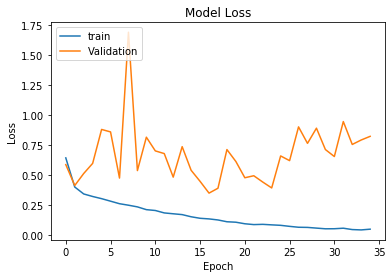

In [107]:
#train and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

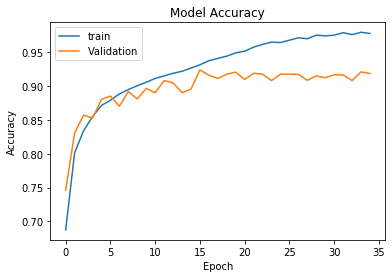

In [79]:
#train and validation accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Validation'],loc='upper left')
plt.show()

In [80]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      cm = cm * 100
      print("\nNormalized confusion matrix")
  else:
      print('\nConfusion matrix, without normalization')
  print(cm)
  print ()

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.0f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


In [81]:
y_pred=model.predict_classes(mergedv)

In [82]:
#accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y1,y_pred)


0.9187838400666389

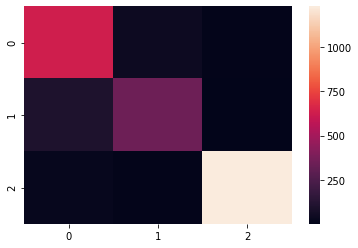

In [83]:

sns.heatmap(confusion_matrix(test_y1,y_pred))

In [84]:

y_pred=model.predict_classes(mergedv)
cnf_matrix = confusion_matrix(test_y1, y_pred)
np.set_printoptions(precision=2) # set NumPy to 2 decimal places


Confusion matrix, without normalization
[[ 634   46    9]
 [ 103  344    3]
 [  25    9 1228]]



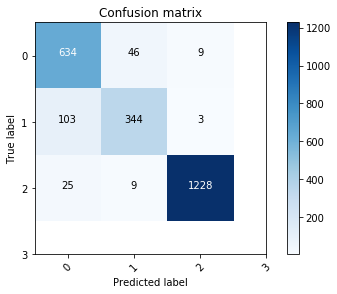

In [85]:
import itertools
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3])


Normalized confusion matrix
[[92.02  6.68  1.31]
 [22.89 76.44  0.67]
 [ 1.98  0.71 97.31]]



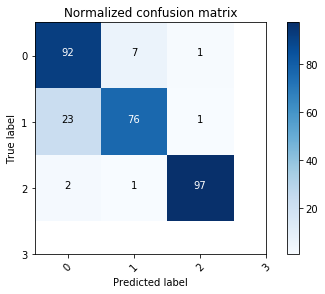

In [86]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3], normalize=True,
                      title='Normalized confusion matrix')         # -----------------to excel for comparision 

In [207]:
model.save('five_channels2.h5')